# Statistical Deep Learning HW2

## 王泓達 R13546017

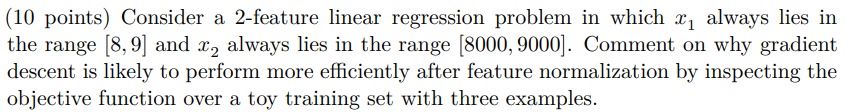

### 資料集
下圖是本次模擬所使用之資料集，並以 $2 x_1 + 3 x_2$ + np.random.normal(-9000,9000,numbers)

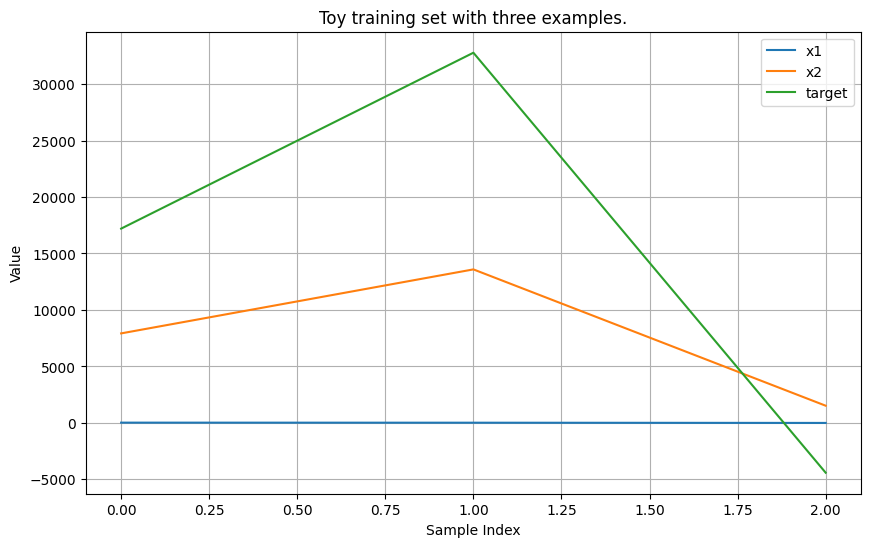
經過梯度下降法可以發現沒有 Normalization 的資料只能跑一次， $\\$
因為把權重列印下來即可發現在訓練的過程中如果沒有先 Normalization 會梯度爆炸，進而產生非常大的 MSE。
因此在 Normalization 後，總共訓練了 $10000$ 次，MSE也降低了非常多，訓練結果顯著提升

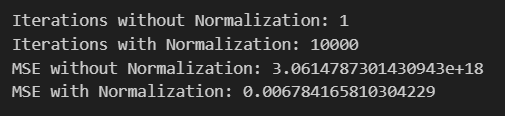

### 準確率比較

#### 未 Normaliziton 時的梯度爆炸

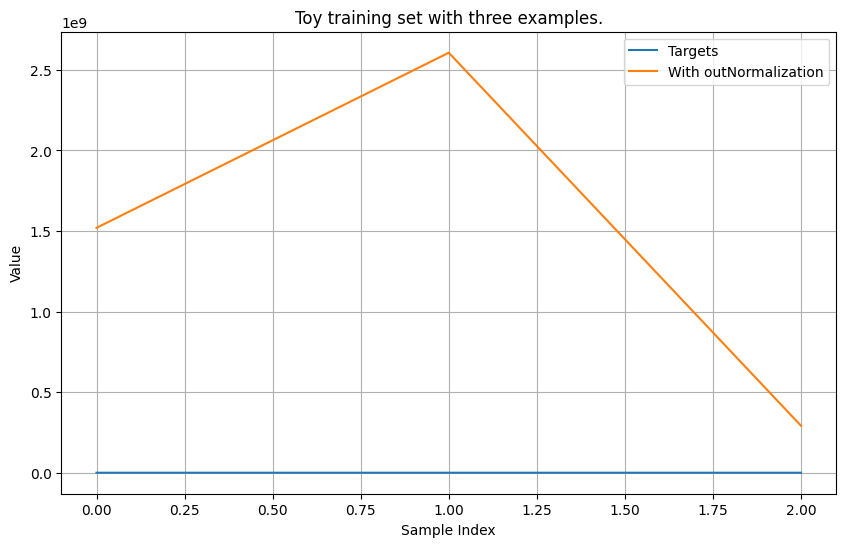

#### Normaliziton 後的準確率

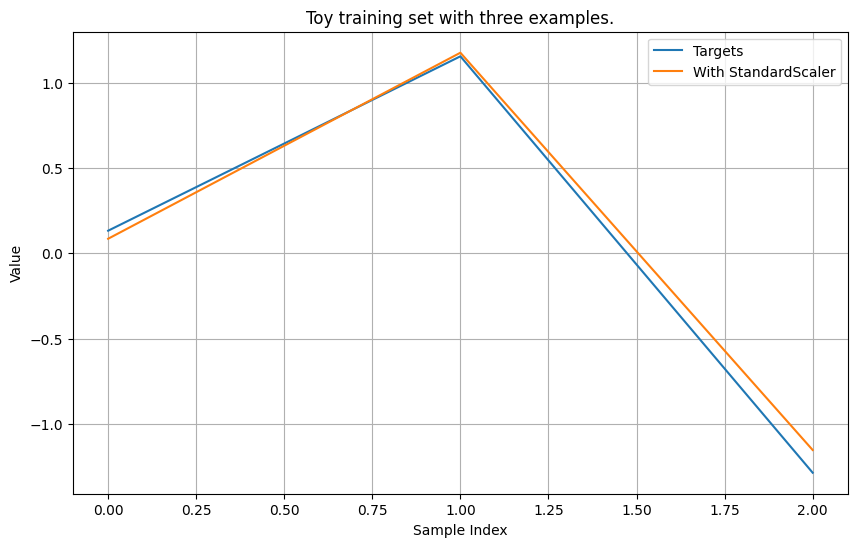

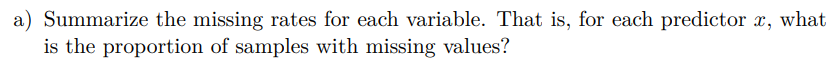

### 缺失值偵測

#### 串列的左側為缺失個數，右側為比率

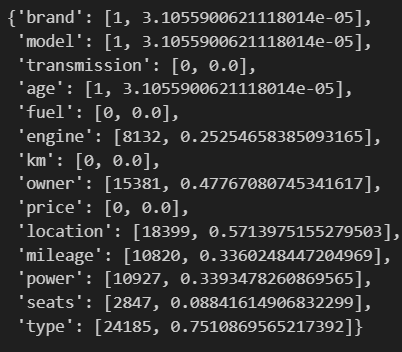

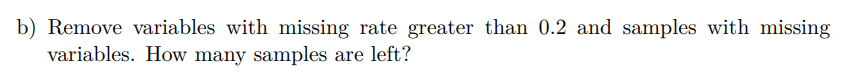

### 移除含有缺失值的 row 及 column

#### 下圖為清理資料的程式碼

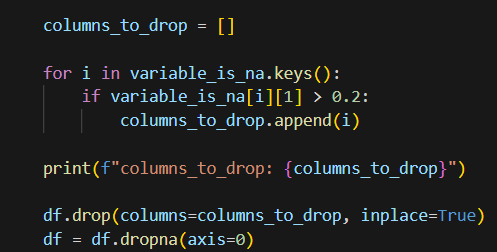

#### 上方為刪除的 column，下方是最後的資料

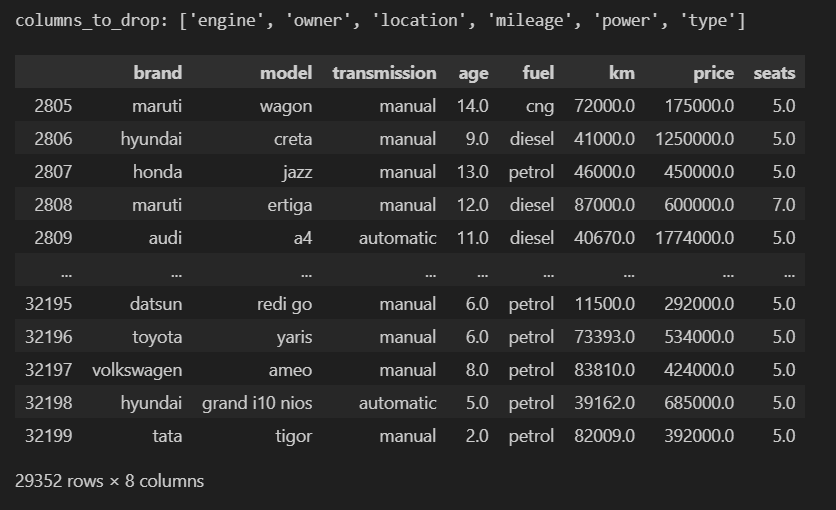

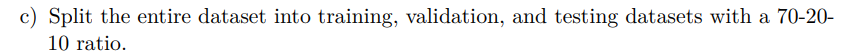

### 分割資料

#### 在分割資料前，我先使用 (d) 和 (e) 的資料處理，輸出欲分析之資料

#### 下圖是做完 (d) 和 (e) 後的結果

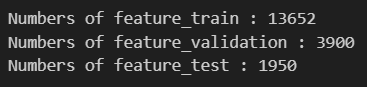

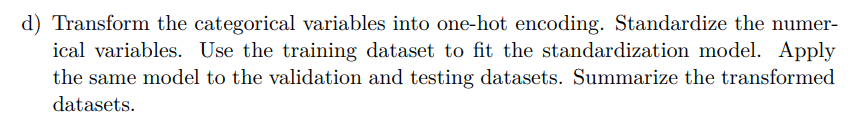

### 資料前處理

#### 在資料前處理之前我先使用 (e) 的要求，減少 trainable parameters

#### 在標準化上我使用 StandardScaler()實行標準化，並利用pandas的get_dummies函式進行one-hot encoding

#### 下圖是我最後處理的結果

##### 數值型資料

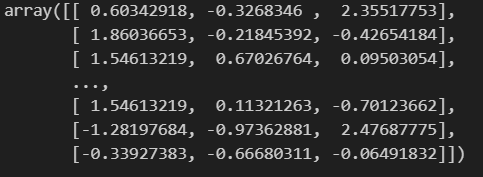

##### 類別型資料

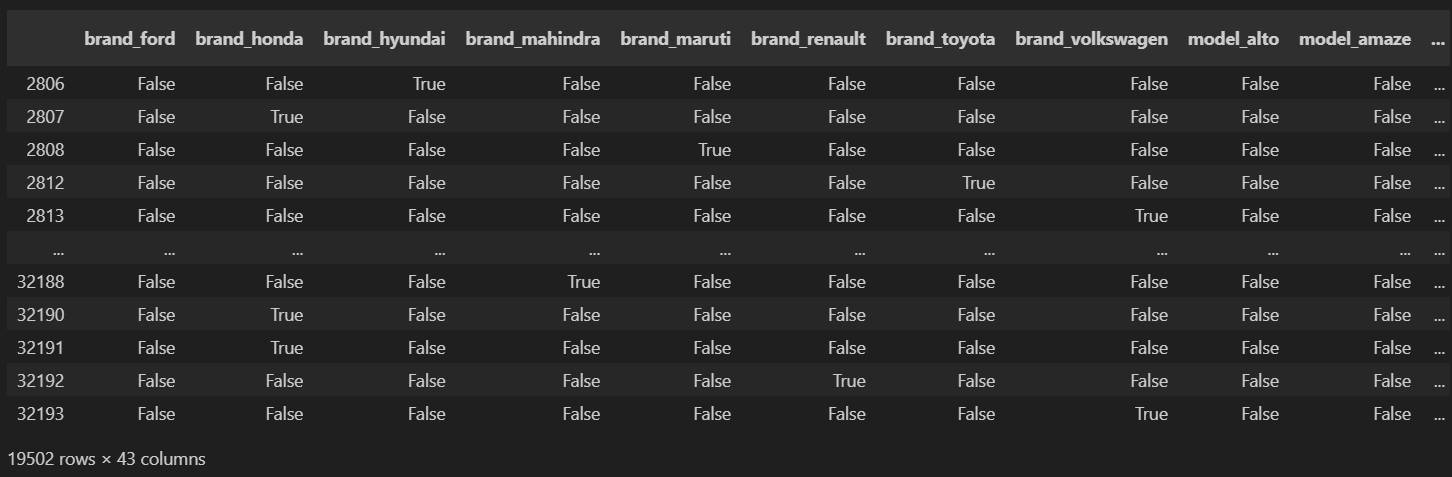

##### 合併後的資料(Numpy 型態)

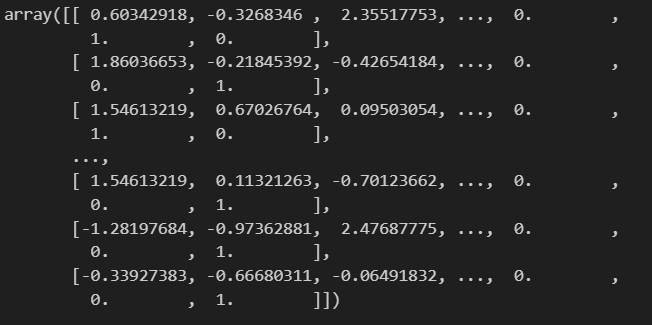

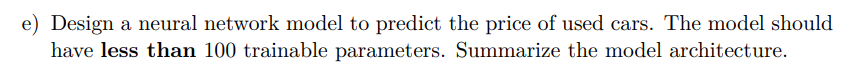

### 資料篩選

#### 承上敘述，我在此以出現頻率為基準，希望透過刪除不常見的類別，以增加對常見類別組合的預測準確率 (將稀少類別組合視為white noise)

#### 我以 $1 \%$ 為基準，得出下面保留的類別

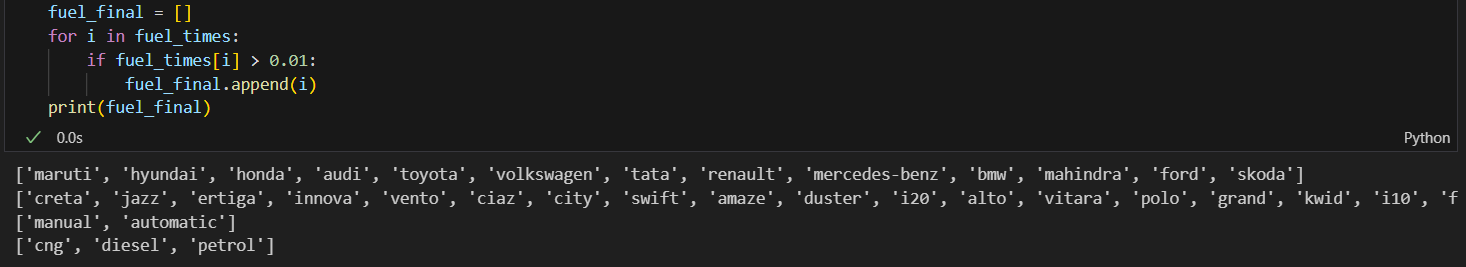

### 模型建置

#### 我使用 $46$ 個神經元作為輸入層，並收斂成 $2$ 個，最後輸出 $1$ 個預測結果 $\\$ 在層與層中間以 ReLU 作為 activation function 連接，最後再以MSE作為 loss function。

#### 為了增加訓練效率，在此模型中我加入了 EarlyStopping 比較 validation loss $\\$ 使其更早結束以小於 100 個 epochs，同時防止 overfitting。

### 訓練結果 (共使用 $97$ 個 trainable parameter)

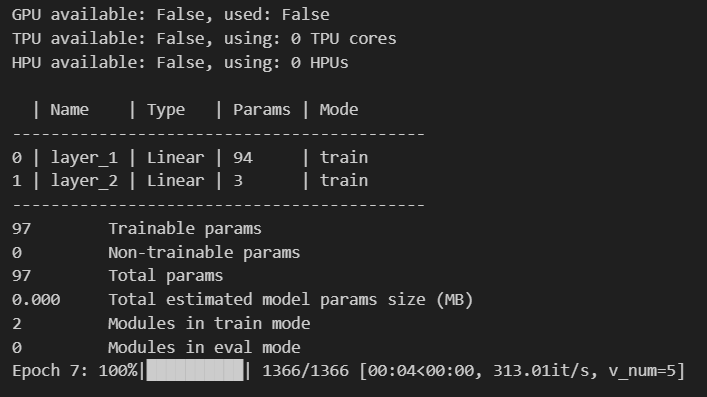

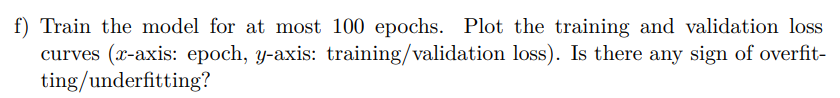

### Loss Function 變化曲線

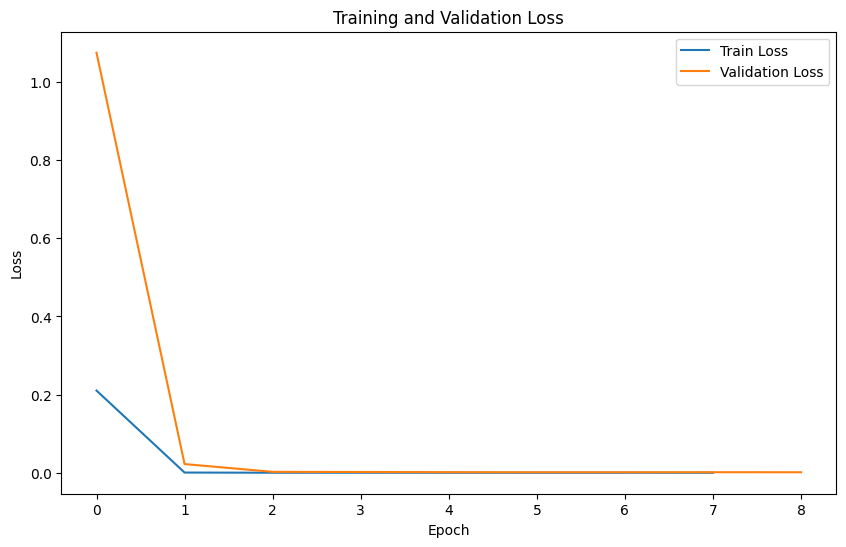

#### 圖表解釋

- Training loss 在一開始非常大，但由於我們訓練了一次並改變參數，於是可以看到 validation loss 遠低於 training loss
- 經過一次訓練後 training loss 和 validation loss 都有了很大的改善，且這時 training loss 已小於 validation loss $\\$ 這是因為我們都針對 training data 進行訓練
- 在最後的幾次訓練都沒有太大的改變，因此 EarlyStopping 生效，停止訓練

#### 共經過 $7$ 個 epochs，最後 training loss 和 validation loss 的差距極小，故目前沒有 overfitting 或 underfitting 的跡象

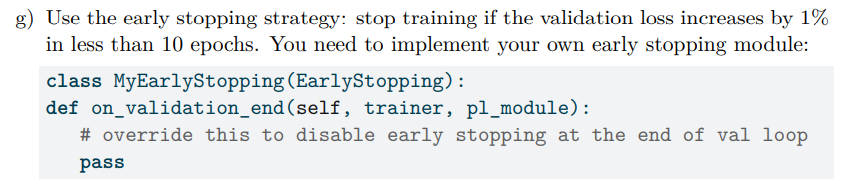

### 新的 EarlyStopping Strategy

#### 我使用 loss_now 和 loss_past 紀錄每一次的 validation loss 變化

#### 再透過不斷迭代 loss_up 紀錄上升之 validation loss，loss_up_up 則是用來記錄目前最高的 validation loss

#### 最後以 counter 紀錄是否超過 10 次，以決定是否停止，程式碼細節如下圖

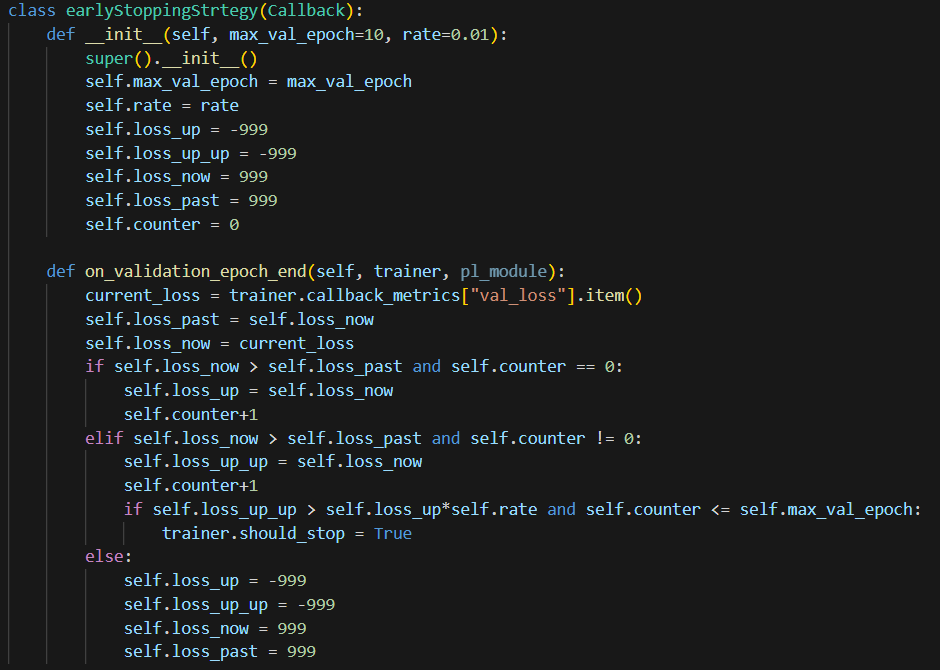

### 執行結果

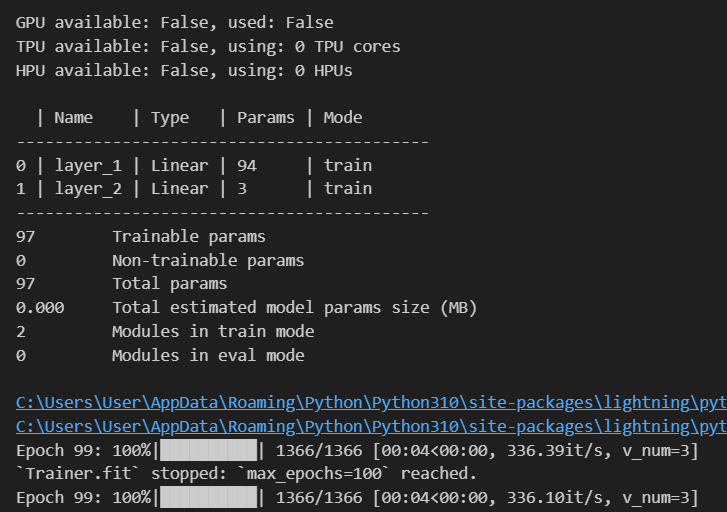

### 結果分析

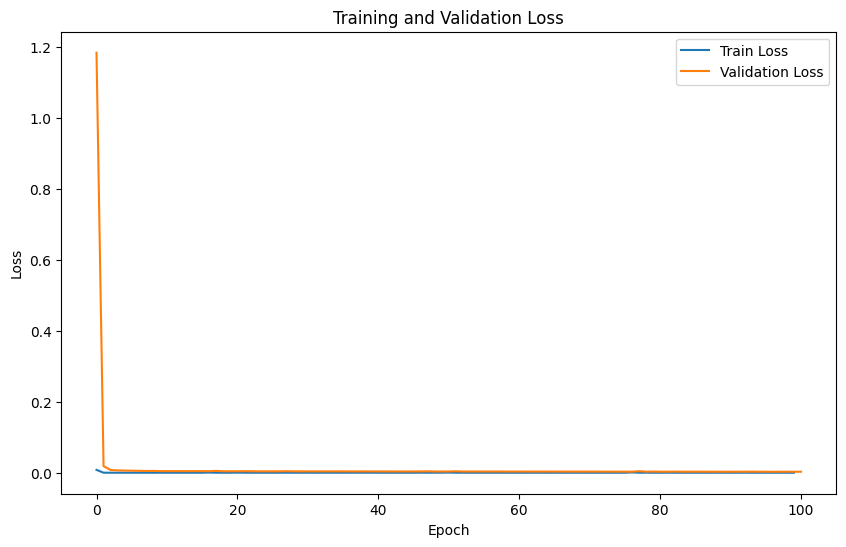

#### 由上二圖可知，epochs 數目約等於 $100$，然而效果提升卻極不顯著，我認為原因是在 validation 上升極小甚至下降的時候

#### 此 EarlyStopping 策略沒有辦法有效的提前停止訓練

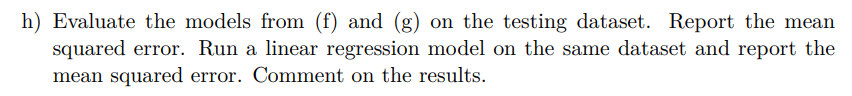

### 附圖為線性迴歸模型實作

#### 我使用 training data 訓練模型，並以 testing data 驗證結果

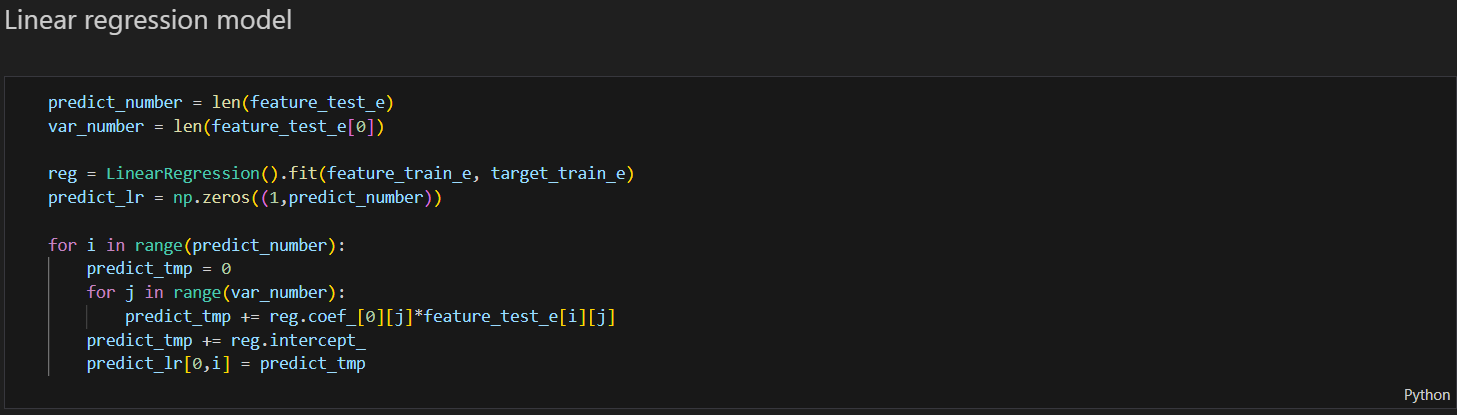

#### 得到三種模型後，分別計算其 MSE

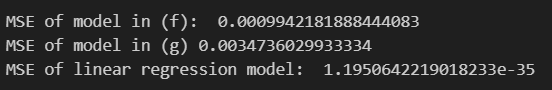

#### 我們發現最後的結果為線性迴歸模型最好，再來是 (f) 小題的原模型，最後才是 (g) 改變 EarlyStopping 策略的模型

#### 我們猜測線性迴歸模型的效果最好是因為該資料集很完整且理想，故有極強的線性關係

#### (g) 應為訓練太多次產生 overfitting 導致準確率反而不如原本

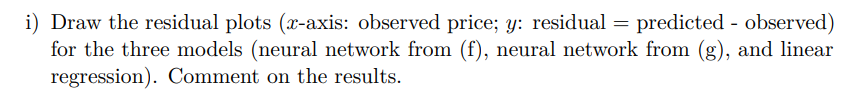

### 下圖為殘差圖

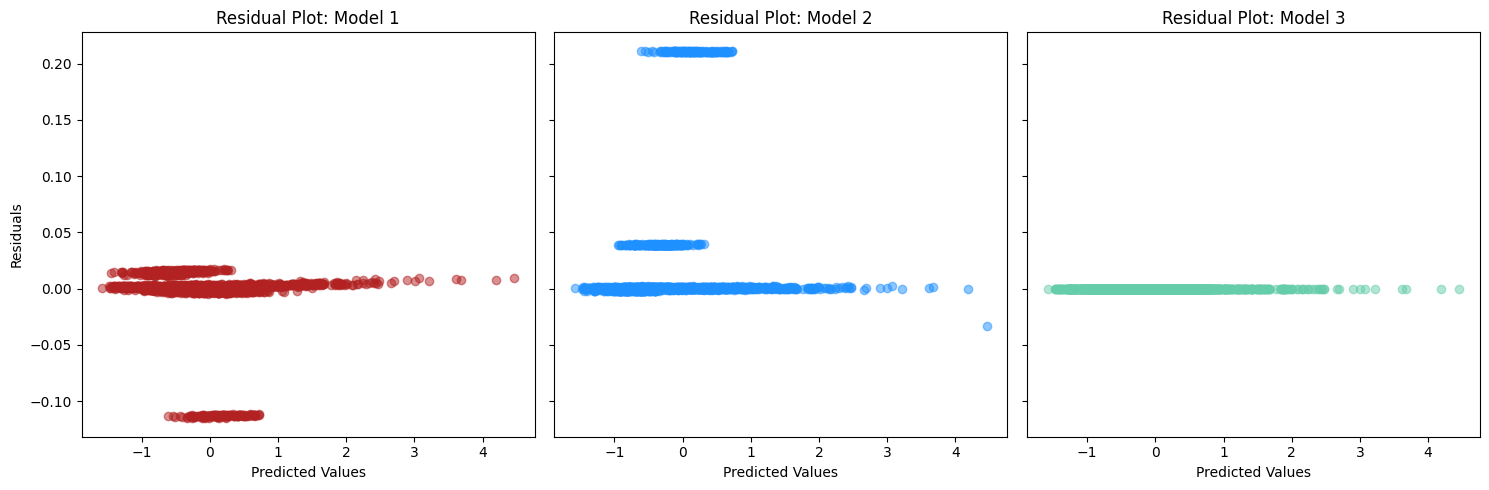

#### 如同上文之MSE結果，線性迴歸模型的殘差極小，幾乎都趨近於零

#### 而 (g) 之模型殘差則明顯大於 (f)，且可以看出通常是越接近原點的資料越容易偏差

### 補充

#### 下圖是 TensorBoard 輸出之圖表

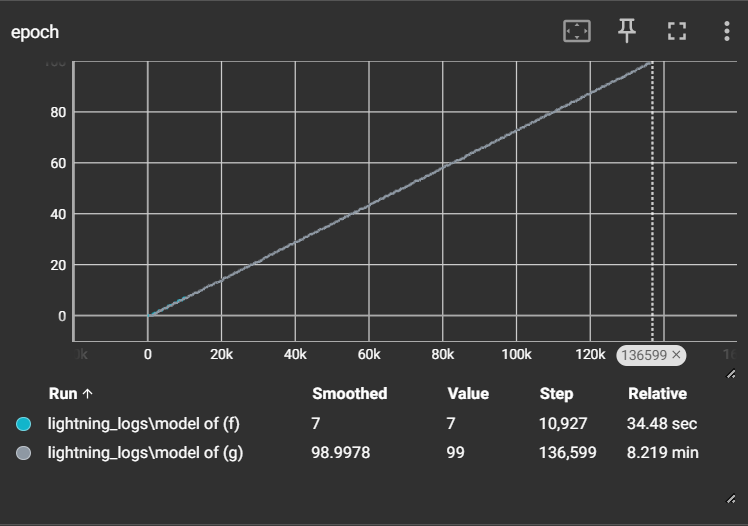

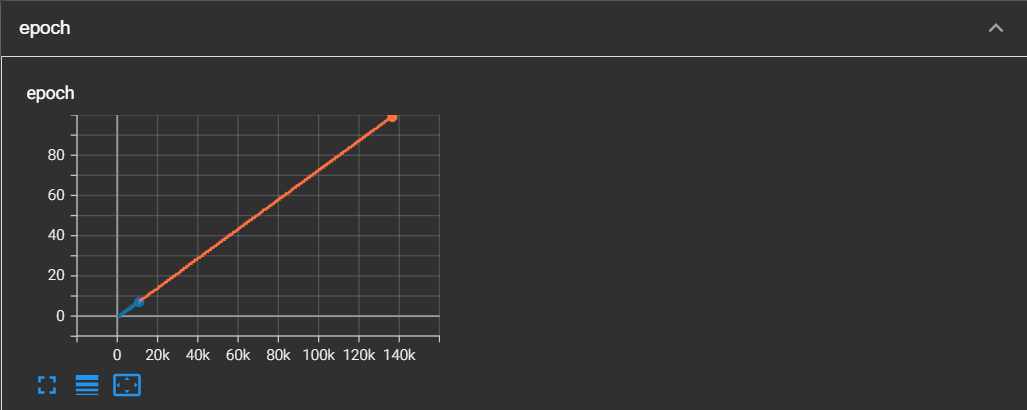

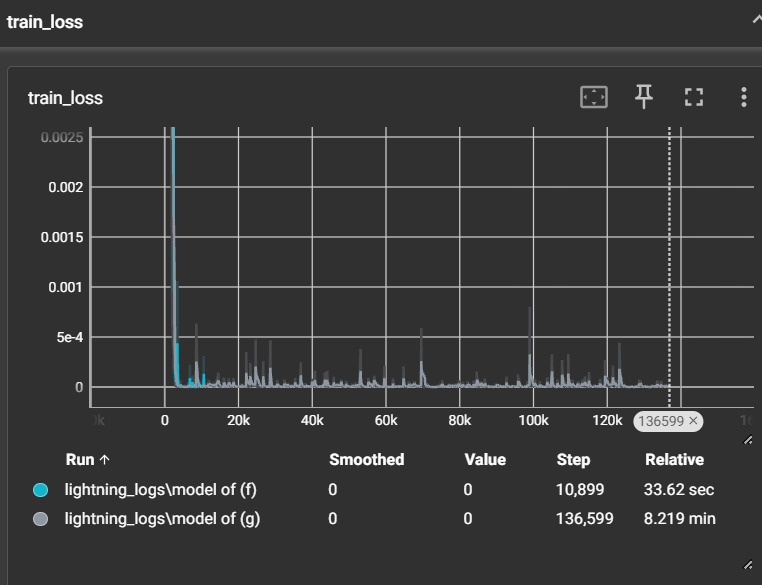

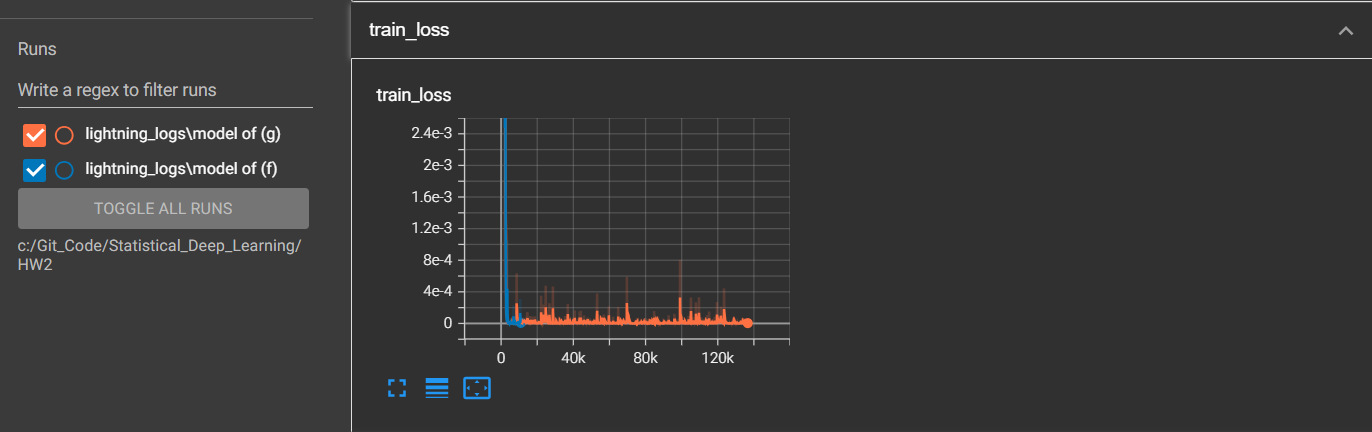

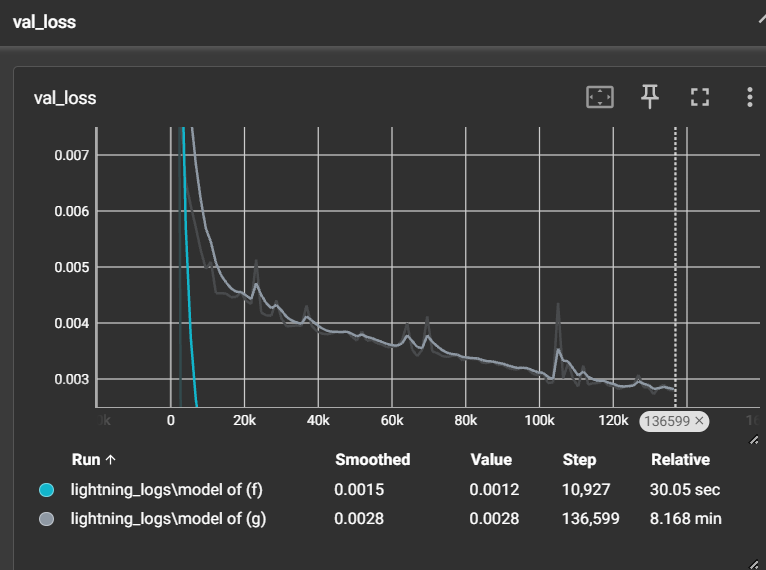

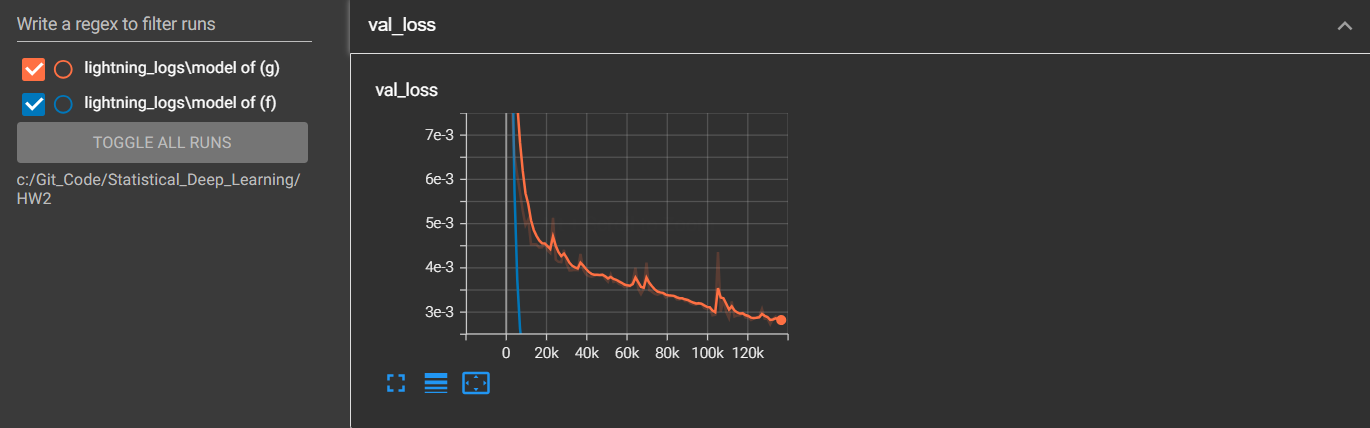